# Photon Emission Protocol — Line and Star Graphs

Solve the photon-emission protocol for two simple graph topologies:

1. **Line graph** ($n = 11$) — a path where each vertex connects to its neighbours.
2. **Star graph** ($n = 6$) — a central vertex connected to all others.

In [1]:
import numpy as np

from emission import (
    StabilizerState,
    circuit_solver,
    protocol_executor,
    generators_equivalence,
    operation_to_quantikz,
    compile_quantikz_pdf,
    plot_graph,
    plot_height_function,
)

In [2]:
def run_example(n, edges, filename):
    """Full pipeline: plot, solve, verify, quantikz+PDF, height function."""
    Gamma = np.zeros((n, n), dtype=np.int8)
    for i, j in edges:
        Gamma[i, j] = 1
        Gamma[j, i] = 1

    plot_graph(n, edges, title=f'{filename}  (n = {n})')

    gen = StabilizerState(np.eye(n, dtype=np.int8), Gamma, np.zeros(n, dtype=np.int8))
    op, inv_op, stat = circuit_solver(gen)
    print(f'  Photons: {stat["PhotonsNumber"]}, Emitters: {stat["EmittersNumber"]}')

    _, g_phi = protocol_executor(inv_op, stat['EmittersNumber'], stat['PhotonsNumber'])
    print('  Equivalence:', generators_equivalence(gen, g_phi))

    operation_to_quantikz(op, stat['PhotonsNumber'], stat['EmittersNumber'], filename)
    compile_quantikz_pdf(filename)

    plot_height_function(stat['HeightFunc'], title=f'{filename} — height function')
    print(f'  Height function h = {stat["HeightFunc"]}')
    return stat

## Example 1 — Line graph ($n = 11$)

Vertices $1, 2, \dots, 11$ connected sequentially: $1\!-\!2\!-\!3\!-\!\cdots\!-\!11$.

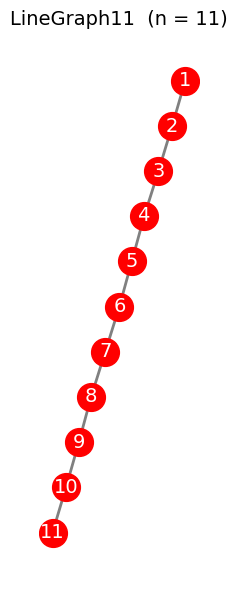

	** The protocol is SOLVED correctly! **
  Photons: 11, Emitters: 1
  Equivalence: {'Overall': True, 'Tableau': True, 'SignVector': True}
	** The quantikz code for latex has been saved as: quantikz_LineGraph11.txt **
	** PDF compiled: quantikz_LineGraph11.pdf **


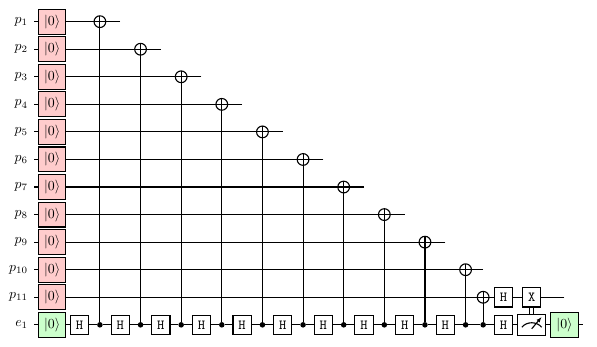

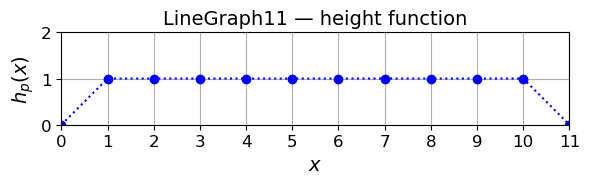

  Height function h = [0 1 1 1 1 1 1 1 1 1 1 0]


In [3]:
n_line = 11
edges_line = [(i, i + 1) for i in range(n_line - 1)]
stat_line = run_example(n_line, edges_line, 'LineGraph11')

## Example 2 — Star graph ($n = 6$)

Central vertex $1$ connected to leaves $2, 3, 4, 5, 6$.

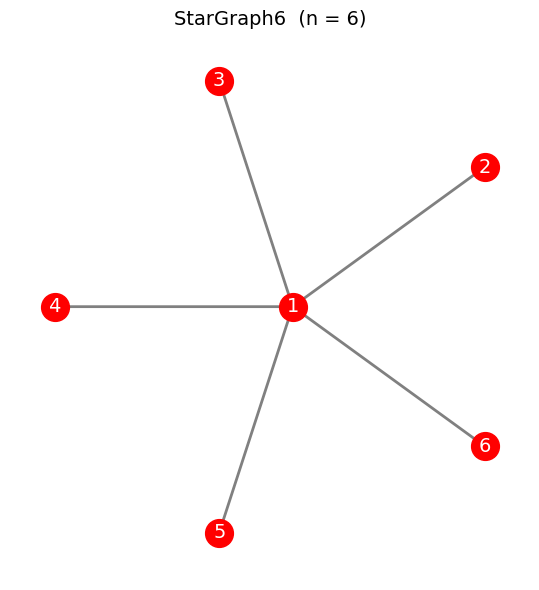

	** The protocol is SOLVED correctly! **
  Photons: 6, Emitters: 1
  Equivalence: {'Overall': True, 'Tableau': True, 'SignVector': True}
	** The quantikz code for latex has been saved as: quantikz_StarGraph6.txt **
	** PDF compiled: quantikz_StarGraph6.pdf **


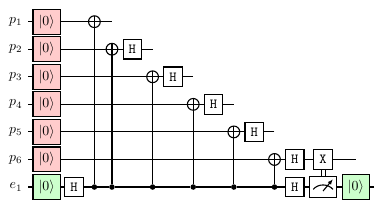

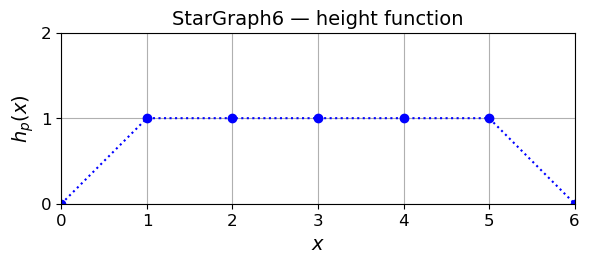

  Height function h = [0 1 1 1 1 1 0]


In [4]:
n_star = 6
edges_star = [(0, i) for i in range(1, n_star)]
stat_star = run_example(n_star, edges_star, 'StarGraph6')